## MULTIPLE LINEAR REGRESSION

Assignment Task:

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

Taskes:

1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

5.Apply Lasso and Ridge methods on the model.


# 1. Exploratory Data Analysis (EDA)

In [107]:
import pandas as pd

# Load data
data = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

# Check the first few records
print(data.head())

# Get summary statistics
print(data.describe())


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.

Visualizations

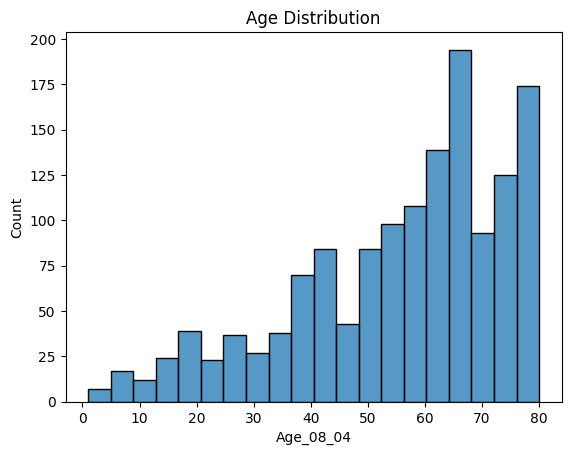

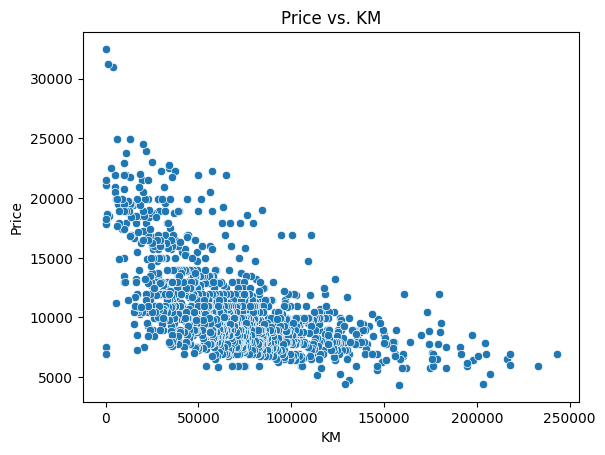

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Age
sns.histplot(data['Age_08_04'], bins=20)
plt.title('Age Distribution')
plt.show()

# Scatter plot
sns.scatterplot(x='KM', y='Price', data=data)
plt.title('Price vs. KM')
plt.show()


# 2. Data Preprocessing

Handling Categorical

In [111]:
data = pd.get_dummies(data, columns=['Fuel_Type'], drop_first=True)
data['Automatic'] = data['Automatic'].apply(lambda x: 1 if x == 'yes' else 0)


Splitting the Data

In [112]:
from sklearn.model_selection import train_test_split

X = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1148, 11) (1148,)
Testing set shape: (288, 11) (288,)


# 3.Build a Multiple Linear Regression Model

In [113]:
from sklearn.linear_model import LinearRegression

# Model 1: Basic Linear Regression
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [114]:
# Coefficients interpretation
coefficients = pd.DataFrame(model1.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                   Coefficient
Age_08_04        -1.204596e+02
KM               -1.628370e-02
HP                1.345912e+01
Automatic        -4.618528e-13
cc               -2.168559e-02
Doors            -6.499651e+01
Cylinders         4.547474e-13
Gears             5.312611e+02
Weight            2.621390e+01
Fuel_Type_Diesel -1.159684e+02
Fuel_Type_Petrol  1.379235e+03


# 4.Evaluate the Model

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model1.predict(X_test)
print("R^2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R^2: 0.833729931263407
MAE: 991.5541216778417
MSE: 2218506.4181801397


# 5.Apply Lasso and Ridge Regression

In [120]:
from sklearn.linear_model import Lasso, Ridge


In [117]:
# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [118]:
# Ridge regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)


Ridge(alpha=0.1)

In [119]:

# Model evaluation
print("Lasso R^2:", r2_score(y_test, lasso.predict(X_test)))
print("Ridge R^2:", r2_score(y_test, ridge.predict(X_test)))


Lasso R^2: 0.8337999542913808
Ridge R^2: 0.8337575988328197


# Interview Questions

# 1. Normalization & Standardization:

* Normalization scales the data to a range (0 to 1). Useful when features have different units. Helps in algorithms sensitive to feature scales.
* Standardization centers the data (mean = 0 and variance = 1). Useful for algorithms that assume normality in data distribution.

# 2. Techniques to Address Multicollinearity:

* Remove highly correlated variables.
* Use Principal Component Analysis (PCA) to reduce dimensionality.
* Apply regularization techniques like Lasso and Ridge regression that help mitigate multicollinearity.